In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df

,Name,Age,Gender,Score,City
0,Student_0,21.0,Female,89.798488,Taichung
1,Student_1,18.0,Male,78.967743,Tainan
2,Student_2,19.0,Female,57.167489,Taichung
3,Student_3,21.0,Male,NaN,Tainan
4,Student_4,17.0,NaN,78.272234,Tainan
...,...,...,...,...,...
145,Student_145,21.0,Female,NaN,Taipei
146,Student_146,21.0,Female,75.443506,Tainan
147,Student_147,NaN,Female,NaN,Kaohsiung
148,Student_148,NaN,Male,NaN,Tainan


In [3]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer_mode.fit(df[["Age","Score"]])
ok_imputer = imputer_mode.transform(df[["Age","Score"]])
df["Age"] = ok_imputer[:,0]
df["Score"] = ok_imputer[:,1]
df


,Name,Age,Gender,Score,City
0,Student_0,21.000000,Female,89.798488,Taichung
1,Student_1,18.000000,Male,78.967743,Tainan
2,Student_2,19.000000,Female,57.167489,Taichung
3,Student_3,21.000000,Male,74.876317,Tainan
4,Student_4,17.000000,NaN,78.272234,Tainan
...,...,...,...,...,...
145,Student_145,21.000000,Female,74.876317,Taipei
146,Student_146,21.000000,Female,75.443506,Tainan
147,Student_147,18.088889,Female,74.876317,Kaohsiung
148,Student_148,18.088889,Male,74.876317,Tainan


In [4]:
df["Gender"] = df["Gender"].map({"Female":0,"Male":1})
df["Gender"] = df["Gender"].fillna(-1)
df.sample(20,random_state=87)

,Name,Age,Gender,Score,City
7,Student_7,21.000000,1.0,78.415908,Taipei
130,Student_130,17.000000,1.0,74.876317,Taichung
111,Student_111,15.000000,0.0,78.827995,Kaohsiung
122,Student_122,21.000000,1.0,50.434069,Taichung
132,Student_132,15.000000,0.0,86.235418,Kaohsiung
50,Student_50,19.000000,0.0,66.424511,Taipei
38,Student_38,18.000000,0.0,78.544196,Taipei
87,Student_87,20.000000,1.0,79.468901,Tainan
78,Student_78,18.000000,0.0,78.440681,Taichung
56,Student_56,18.088889,0.0,76.838555,Kaohsiung


In [5]:
df = df.drop("Name",axis=1)
# df["City"].drop("")
df["City"] = df["City"].map({"Taipei":1,"Taichung":2,"Kaohsiung":3,"Tainan":5})
df["City"] = df["City"].fillna(-1)
clean_df = df.copy()
clean_df

,Age,Gender,Score,City
0,21.000000,0.0,89.798488,2.0
1,18.000000,1.0,78.967743,5.0
2,19.000000,0.0,57.167489,2.0
3,21.000000,1.0,74.876317,5.0
4,17.000000,-1.0,78.272234,5.0
...,...,...,...,...
145,21.000000,0.0,74.876317,1.0
146,21.000000,0.0,75.443506,5.0
147,18.088889,0.0,74.876317,3.0
148,18.088889,1.0,74.876317,5.0


In [6]:
clean_df = clean_df.copy()
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder()
Encoder.fit(clean_df[["City"]])
Encoder.categories_
x = Encoder.transform(clean_df[["City"]]).toarray()
# 用 sklearn 提供的名稱自動命名
clean_df[Encoder.get_feature_names_out(["City"])] = x
clean_df = clean_df.drop("City", axis=1)

clean_df

,Age,Gender,Score,City_-1.0,City_1.0,City_2.0,City_3.0,City_5.0
0,21.000000,0.0,89.798488,0.0,0.0,1.0,0.0,0.0
1,18.000000,1.0,78.967743,0.0,0.0,0.0,0.0,1.0
2,19.000000,0.0,57.167489,0.0,0.0,1.0,0.0,0.0
3,21.000000,1.0,74.876317,0.0,0.0,0.0,0.0,1.0
4,17.000000,-1.0,78.272234,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
145,21.000000,0.0,74.876317,0.0,1.0,0.0,0.0,0.0
146,21.000000,0.0,75.443506,0.0,0.0,0.0,0.0,1.0
147,18.088889,0.0,74.876317,0.0,0.0,0.0,1.0,0.0
148,18.088889,1.0,74.876317,0.0,0.0,0.0,0.0,1.0


In [7]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(clean_df[["Age","Score"]])
Scaler_ = Scaler.transform(clean_df[["Age","Score"]])
df_scaler = clean_df.copy()
df_scaler[["Age","Score"]] = Scaler_
df_scaler

,Age,Gender,Score,City_-1.0,City_1.0,City_2.0,City_3.0,City_5.0
0,1.518990,0.0,1.470373e+00,0.0,0.0,1.0,0.0,0.0
1,-0.046381,1.0,4.031534e-01,0.0,0.0,0.0,0.0,1.0
2,0.475409,0.0,-1.744960e+00,0.0,0.0,1.0,0.0,0.0
3,1.518990,1.0,1.400283e-15,0.0,0.0,0.0,0.0,1.0
4,-0.568172,-1.0,3.346206e-01,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
145,1.518990,0.0,1.400283e-15,0.0,1.0,0.0,0.0,0.0
146,1.518990,0.0,5.588860e-02,0.0,0.0,0.0,0.0,1.0
147,0.000000,0.0,1.400283e-15,0.0,0.0,0.0,1.0,0.0
148,0.000000,1.0,1.400283e-15,0.0,0.0,0.0,0.0,1.0


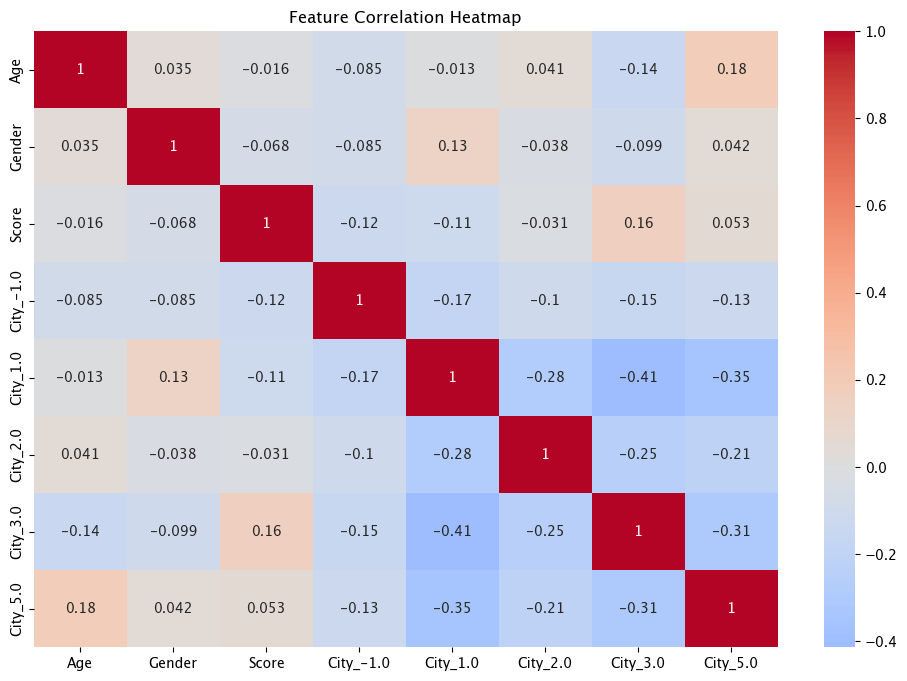

In [8]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaler.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
x = df_scaler[["Age","Gender","City_-1.0","City_1.0","City_2.0","City_3.0","City_5.0"]]
y = df_scaler["Score"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=87)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
model.fit(x_train_poly, y_train)
print("Poly R² Score:", model.score(poly.transform(x_train), y_train))

Poly R² Score: 0.1120841616181325


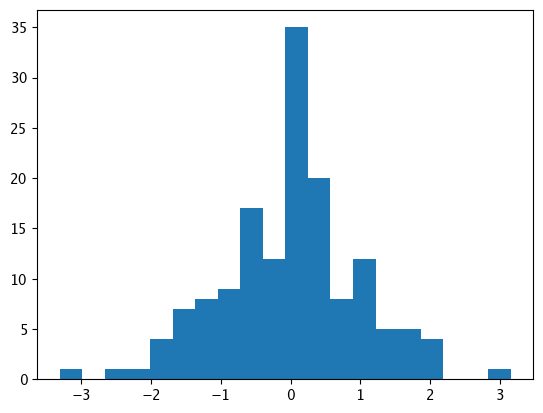

In [11]:
plt.hist(df_scaler["Score"], bins=20)
plt.show()